In [1]:
#importando bibliotecas

#IMPRIMO OS GRÁFICOS DENTRO DO JUPYTER
%matplotlib inline

#manipulação de dados de arrays
import numpy as mp
import pandas as pd

#machine learning
import sklearn as sk
from sklearn import svm

#visualização
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#lendo o dataset
titanic = pd.read_csv("../Treino/train.csv")
titanic_teste = pd.read_csv("../Teste/test.csv")


# mostra os tipos das variáveis do dataset
titanic.dtypes
titanic_teste.tail()

id_passageiro = titanic_teste['PassengerId']

In [3]:
# variáveis numéricas/quantitativas: 
#    - discreta: sibsp, parch
#    - continuous: age, fare

# variáveis categóricas/qualitativas:
#    - nominal: name, ticket, survived, cabin
#    - ordinal: Pclass

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
#COLUNAS QUE NÃO CONTRIBUEM PARA A ANÁLISE SÃO RETIRADAS
titanic1 = titanic.copy()
titanic1.drop(['PassengerId','Cabin','Ticket','Name'], axis=1, inplace=True)

titanic_teste.drop(['PassengerId','Cabin','Ticket','Name'], axis=1, inplace=True)

# visualização de dados

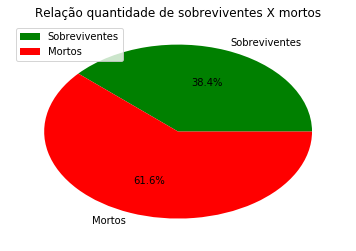

In [5]:
vivos = len(titanic[titanic['Survived'] == 1])
mortos = len(titanic[titanic['Survived'] == 0])

fatias = [vivos, mortos]
labels = ['Sobreviventes','Mortos']

plt.pie(fatias,labels=labels,autopct='%1.1f%%',colors=['g','r'])
plt.legend(loc='upper left',prop={'size':10})
plt.title('Relação quantidade de sobreviventes X mortos')
plt.show()

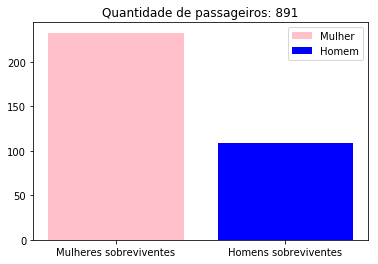

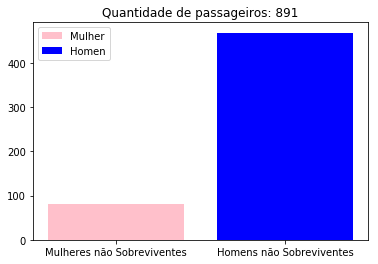

In [6]:
#RELAÇÃO ENTRE HOMENS E MULHERES QUE SOBREVIVERAM
M = len(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)])
H = len(titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)])

plt.bar('Mulheres sobreviventes',M, label='Mulher', color='pink')
plt.bar('Homens sobreviventes',H,label='Homem',color='b')
plt.title("Quantidade de passageiros: " + str(len(titanic['PassengerId'])))
plt.legend()
plt.show()

print("\n\n")

#-------------------------------------------------------------------------------------------------------------------------

#RELAÇÃO ENTRE HOMENS E MULHERES QUE NÃO SOBREVIVERAM
M1 = len(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 0)])
H1 = len(titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 0)])

plt.bar('Mulheres não Sobreviventes',M1,color='pink',label='Mulher')
plt.bar('Homens não Sobreviventes',H1, label='Homen', color='b')
plt.title("Quantidade de passageiros: " + str(len(titanic['PassengerId'])))
plt.legend()
plt.show()

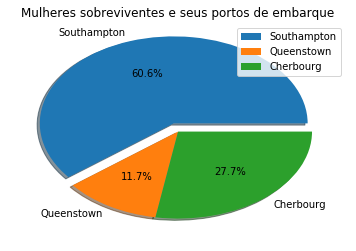

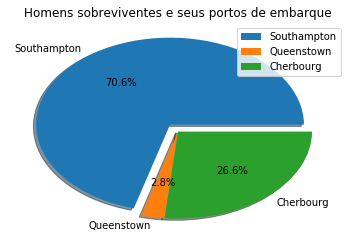

In [7]:
#mulheres que embarcaram em Southampton e sobreviveram 
Mulheres_S = len(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1) & (titanic['Embarked'] == 'S')])

#mulheres que embarcaram em Queenstown e sobreviveram
Mulheres_Q = len(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1) & (titanic['Embarked'] == 'Q')])

#mulheres que embarcaram em Cherbourg e sobreviveram
Mulheres_C = len(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1) & (titanic['Embarked'] == 'C')])

#dados para plot
labels = ['Southampton','Queenstown','Cherbourg']
sizes = [Mulheres_S,Mulheres_Q,Mulheres_C]
explode = (0.1,0,0)

#plot
plt.pie(sizes,explode=explode,labels=labels,autopct='%.1f%%', shadow=True)
plt.title('Mulheres sobreviventes e seus portos de embarque')
plt.legend()
plt.show()

print("\n\n")

#--------------------------------------------------homens-----------------------------------------------------------------------

#homens que embarcaram em Southampton e sobreviveram 
homens_S = len(titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1) & (titanic['Embarked'] == 'S')])

#homens que embarcaram em Queenstown e sobreviveram
homens_Q = len(titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1) & (titanic['Embarked'] == 'Q')])

#homens que embarcaram em Cherbourg e sobreviveram
homens_C = len(titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1) & (titanic['Embarked'] == 'C')])

#dados para plot
labels = ['Southampton','Queenstown','Cherbourg']
sizes = [homens_S, homens_Q, homens_C]
explode = (0.1,0,0)

#plot
plt.pie(sizes,explode=explode,labels=labels,autopct='%.1f%%', shadow=True)
plt.title('Homens sobreviventes e seus portos de embarque')
plt.legend()
plt.show()

#--------------------------------------------------comentários-----------------------------------------------------------------------

#A maioria tanto dos homens quanto das mulheres sobreviventes foram de Southmpton, mas isso se deve somente ao fato de 
# a maioria das pessoas terem vindo de lá.

max      512.329200
min        0.000000
mean      32.204208
count    891.000000
Name: Fare, dtype: float64 




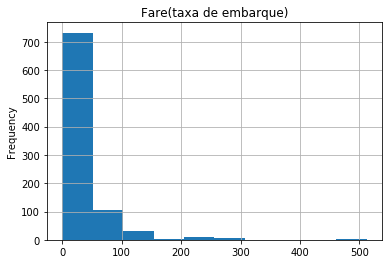

In [8]:
# QUANTIDADE A RESPEITO DA COLUNA FARE
print(titanic1['Fare'].agg(['max','min','mean','count']),"\n\n")

#HISTOGRAMA DA FREQUÊNCIA PARA TAXA DE EMBARQUE(FARE)
titanic1['Fare'].plot(kind='hist')
plt.grid()
plt.title("Fare(taxa de embarque)")
plt.show()

# modificação dos dados

In [9]:
# modificar o fare para números discretos
# [0,25] muito pobre = 0
# (25,50] pobre = 1
# (50,100] médio = 2
# (100,250] média alta = 3
# (250, ~) rico = 4

def fare_to_discretValue(titanic):
    lista = titanic['Fare']
    lista2 = []

    for valor in lista:
        if((float(valor) >= 0) & (float(valor) <= 25)):
            lista2.append(int(0))
        elif((float(valor) > 25) & (float(valor) <= 50)):
            lista2.append(int(1))
        elif((float(valor) > 50) & (float(valor) <= 100)):
            lista2.append(int(2))
        elif((float(valor) > 100) & (float(valor) <= 250)):
            lista2.append(int(3))
        elif(float(valor) > 250):
            lista2.append(int(4))
        else:
            lista2.append(int(5))
            
    return lista2

#dados de treino
titanic2 = titanic1.copy()
titanic2.Fare = fare_to_discretValue(titanic1)

#dados de teste
titanic_teste.Fare = fare_to_discretValue(titanic_teste)

In [10]:
# modificar a idade para valores discretos
# 0 ~ 10 criança = 0
# 11 ~ 19 adolescente = 1
# 20 ~ 30 jovem adulto = 2
# 31 ~ 59 adulto = 3
# 60 ~ idoso = 4
# indefinido = 5

def Age_to_discreteInterval(titanic):
    lista = titanic['Age']
    lista2 = []
    for valor in lista:
        if((valor > 0) & (valor <= 10)):
            lista2.append(int(0))
        elif((valor >= 11) & (valor <= 19)):
            lista2.append(int(1))
        elif((valor >= 20) & (valor <= 30)):
            lista2.append(int(2))
        elif((valor >= 31) & (valor <= 59)):
            lista2.append(int(3))
        elif(valor >= 60):
            lista2.append(int(4))
        else:
            lista2.append(int(5))
    return lista2

#dados de treino
titanic3 = titanic2.copy()
titanic3['Age'] = Age_to_discreteInterval(titanic2)

#dados de teste
titanic_teste.Age = Age_to_discreteInterval(titanic_teste)

In [11]:
# trocar dados categóricos para dados numéricos
# 0 - female
# 1 = male

def sex_to_discrete(titanic):
    lista = []
    for valor in titanic['Sex']:
        if(valor == 'female'):
            lista.append(0)
        else:
            lista.append(1)
    return lista

#dados de treino
titanic4 = titanic3.copy()
titanic4['Sex'] = sex_to_discrete(titanic3)

#dados de teste
titanic_teste.Sex = sex_to_discrete(titanic_teste)

In [12]:
#juntando duas colunas em uma coluna só

#dados de treino
family = titanic4['SibSp'] + titanic4['Parch']
titanic5 = titanic4.copy()
titanic5.drop(['SibSp','Parch'], axis=1, inplace=True)
titanic5['Family'] = family

#dados de teste
titanic_teste['Family'] = titanic_teste['SibSp'] + titanic_teste['Parch']
titanic_teste.drop(['SibSp','Parch'], axis=1, inplace=True)

In [13]:
# TROCANDO VARIÁVEIS CATEGÓRICAS POR NUMÉRICAS DISCRETA
# S = 0
# Q = 1
# C = 2

def embarked_to_numeric(titanic):
    lista = []
    for valor in titanic['Embarked']:
        if(valor == 'S'):
            lista.append(0)
        elif(valor == 'Q'):
            lista.append(1)
        elif(valor == 'C'):
            lista.append(2)
        else:
            lista.append(3)
    return lista

#dados de treino
titanic6 = titanic5.copy()
titanic6['Embarked'] = embarked_to_numeric(titanic5)

#dados de teste
titanic_teste.Embarked = embarked_to_numeric(titanic_teste)

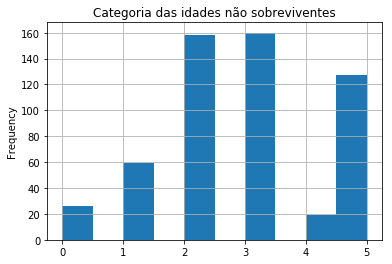

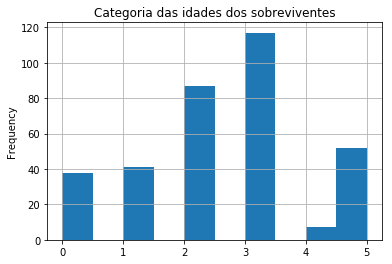

In [14]:
# RELAÇÃO DE SOBREVIVÊNCIA POR IDADE
x = titanic6[titanic6['Survived'] == 0].Age
plt.hist(x)
plt.title('Categoria das idades não sobreviventes')
plt.grid()
plt.ylabel('Frequency')
plt.show()
#-------------------------------------------------------------------------------------------------------------------------

print("\n\n")

#-------------------------------------------------------------------------------------------------------------------------
x2 = titanic6[titanic6['Survived'] == 1].Age
plt.hist(x2)
plt.title('Categoria das idades dos sobreviventes')
plt.grid()
plt.ylabel('Frequency')
plt.show()

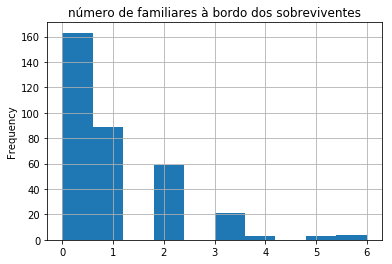

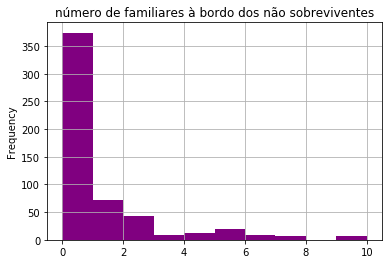

In [15]:
#RELAÇÃO DE SOBREVIVÊNCIA POR NÚMERO DE FAMILIARES À BORDO

x = titanic6[titanic6['Survived'] == 1].Family
plt.hist(x)
plt.title('número de familiares à bordo dos sobreviventes')
plt.grid()
plt.ylabel('Frequency')
plt.show()

#-------------------------------------------------------------------------------------------------------------------------

x2 = titanic6[titanic6['Survived'] == 0].Family
plt.hist(x2,color='purple')
plt.title('número de familiares à bordo dos não sobreviventes')
plt.grid()
plt.ylabel('Frequency')
plt.show()

In [16]:
# RELAÇÃO DE SOBREVIVENTES POR CLASSE SOCIAL

total = titanic6.count().max()

S1 = round((len(titanic6[(titanic6['Survived'] == 1) & (titanic6['Pclass'] == 1)])/len(titanic6[titanic6['Pclass'] == 1]))*100,2)
S2 = round((len(titanic6[(titanic6['Survived'] == 1) & (titanic6['Pclass'] == 2)])/len(titanic6[titanic6['Pclass'] == 2]))*100,2)
S3 = round((len(titanic6[(titanic6['Survived'] == 1) & (titanic6['Pclass'] == 3)])/len(titanic6[titanic6['Pclass'] == 3]))*100,2)


print("Dos",len(titanic6[titanic6['Pclass'] == 1]),"ricos à bordo,",S1,'% sobreviveram')
print("Dos",len(titanic6[titanic6['Pclass'] == 2]),"de classe média à bordo,",S2,'% sobreviveu')
print("Dos",len(titanic6[titanic6['Pclass'] == 3]),"pobres à bordo,",S3,'% sobreviveram')

Dos 216 ricos à bordo, 62.96 % sobreviveram
Dos 184 de classe média à bordo, 47.28 % sobreviveu
Dos 491 pobres à bordo, 24.24 % sobreviveram


# ANÁLISE: 
# 1º: OS RICOS TEM MAIS CHANCES DE SOBREVIVEREM
# 2º: AS MULHERES TÊM MAIS CHANCES DE SOBREVIVEREM
# 3º: CRIANÇAS, ADOLESCENTES TEM MAIS CHANCES DE SOBREVIVEREM
# 4º: PESSOAS COM POUCOS FAMILIARES À BORDO TÊM MAIS CHANCES DE SOBREVIVEREM

In [17]:
# há um número razoável de pessoas que não pagaram nada e ficaram em classes altas
print(len(titanic6[(titanic6['Pclass'] == 2) & (titanic6['Fare'] == 0) & (titanic6['Age'] > 1) & (titanic6['Age'] < 5)]))

90


In [18]:
#dados de aprendizagem
X_treino = titanic6.drop("Survived",axis=1)
#dados que queremos prever
Y_treino = titanic6['Survived']
#dados de teste
X_teste = titanic_teste

In [19]:
X_treino.shape, Y_treino.shape, X_teste.shape

((891, 6), (891,), (418, 6))

In [20]:
#passei uma instância do tipo svc
svc = svm.SVC()
#método de treino
svc.fit(X_treino,Y_treino)
#método de predição
Y_pred = svc.predict(X_teste)
#porcentagem de acerto
acc_svc = round(svc.score(X_treino, Y_treino) * 100, 2)
acc_svc

83.5

In [21]:
submissao = pd.DataFrame()
submissao['PassengerId'] = id_passageiro
submissao['Survived'] = Y_pred

In [22]:
submissao.to_csv("submissao.csv",index=False)